In [30]:
"""
手工标注路网
"""
import json
import pickle
import folium
import networkx as nx
import matplotlib.pyplot as plt
from pyproj import Proj
from networkx import DiGraph
from eviltransform import gcj2wgs, wgs2gcj
from shapely.geometry import Point, LineString, Polygon
buildings = pickle.load(open("data/buildings_fudan_new.pkl", "rb"))
regions = pickle.load(open("data/regions_all.pkl", "rb"))
for bd in buildings:
    bd["poly"] = Polygon(bd["points"])
regions_related = []
for r in regions:
    rpoly = Polygon(r["boundary"])
    for bd in buildings:
        if bd["poly"].within(rpoly):
            regions_related.append(r)
            break
regions = regions_related
projector = Proj("+proj=utm +zone=50 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [44]:
# 一些画图函数
def plot_road_network(regions, buildings, nodes, roads):
    lon_cen, lat_cen = 116.4251, 39.9594
    G_folium = folium.Map(
        location=[lat_cen, lon_cen],
        control_scale=True,
        tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
        attr='高德底图',
        zoom_start=20,
    )
    G_folium.add_child(folium.LatLngPopup())  # ATTENTION
    for region in regions:
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in region["boundary"]],
            opacity=0.8,
            weight=2,
            color="red"
        ).add_to(G_folium)
    for bd in buildings:
        color = "orange" if bd["is_elevator"] else "royalblue"
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in bd["points"]],
            opacity=0.8,
            weight=3,
            popup=(bd["id"], bd["name"]),
            color=color,
        ).add_to(G_folium)
    for node in nodes.values():
        folium.CircleMarker(
            location=wgs2gcj(*node["point"][::-1]),
            opacity=0.8,
            radius=5,
            fill=True,   
            popup=node["id"],
            color="black",
        ).add_to(G_folium)
    for road in roads:
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in road["points"]],
            opacity=0.8,
            weight=3,
            popup=road["od"],
            color="gray"
        ).add_to(G_folium)
    G_folium.save("figure/road_network.html")


def plot_road_network_satellite(regions, buildings, nodes, roads):
    lon_cen, lat_cen = 116.4213, 39.9636
    lat_cen, lon_cen = wgs2gcj(lat_cen, lon_cen)
    G_folium = folium.Map(
        location=[lat_cen, lon_cen],
        control_scale=True,
        tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
        attr='高德-卫星影像图',
        zoom_start=20,
    )
    G_folium.add_child(folium.LatLngPopup())  # ATTENTION
    for region in regions:
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in region["boundary"]],
            opacity=0.8,
            weight=2,
            color="red"
        ).add_to(G_folium)
    for bd in buildings:
        color = "orange" if bd["is_elevator"] else "cyan"
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in bd["points"]],
            opacity=0.8,
            weight=3,
            popup=(bd["id"], bd["name"]),
            color=color
        ).add_to(G_folium)
    for node in nodes.values():
        folium.CircleMarker(
            location=wgs2gcj(*node["point"][::-1]),
            opacity=0.8,
            radius=5,
            fill=True,   
            popup=node["id"],
            color="white",
        ).add_to(G_folium)
    for road in roads:
        folium.PolyLine(
            locations=[wgs2gcj(*p[::-1]) for p in road["points"]],
            opacity=0.8,
            weight=3,
            popup=road["od"],
            color="silver"
        ).add_to(G_folium)
    G_folium.save("figure/road_network_satellite.html")


def matplot_buildings_nodes_roads(regions, buildings, nodes, roads):
    plt.figure(figsize=(20, 20))
    plt.axis("equal")
    for region in regions:
        xys = [projector(*p) for p in region["boundary"]]
        plt.plot(*zip(*xys), c="red")
    for bd in buildings:
        color = "orange" if bd["is_elevator"] else "royalblue"
        xys = [projector(*p) for p in bd["points"]]
        plt.plot(*zip(*xys), c=color)
    for node in nodes.values():
        plt.scatter(*projector(*node["point"]), c="black")
    for road in roads:
        xys = [projector(*p) for p in road["points"]]
        plt.plot(*zip(*xys), c="gray")
    # plt.savefig("figure/road_network.png")
    plt.show()

In [40]:
# 路网节点: {node_id: gps}
# node_id自己随便编一个int
# 以下均为GCJ坐标
nodes = {
    0: (116.424903,39.969165),
    1: (116.426233,39.969189),
    2: (116.427676,39.969128),
    3: (116.428931,39.969025),
    4: (116.4262, 39.967819),
    1000: (116.42825, 39.9688),
    5: (116.427714,39.968787),
    6: (116.427698,39.968914),    
    7: (116.426244,39.968865),  
    8: (116.425005,39.968733),
    9: (116.426242,39.968111),

    10: (116.427013,39.968884),
    11: (116.426468,39.96865),
    12: (116.426468,39.968374),
    13: (116.426253,39.968366),
    14: (116.425829,39.968354),
    15: (116.425684,39.968354),
    16: (116.425341,39.968346),

    17: (116.425346,39.968127),
    18: (116.4256,39.96811),
    19: (116.42584,39.968111),

    21: (116.425041,39.967778),
    1001: (116.4254,39.9678),
    22: (116.425856,39.967802),
    23: (116.426468,39.967819),
    25: (116.425057,39.967436),
    26: (116.4254,39.967444),

    27: (116.426473,39.967165),
    28: (116.425894,39.967095),
    2001: (116.4257,39.967095),
    2002: (116.4261,39.967095),
    29: (116.425073,39.9671),
    30: (116.426484,39.966828),
    31: (116.426237,39.966828),
    32: (116.425899,39.966824),
    33: (116.425792,39.966824),
    34: (116.4256,39.966824),
    35: (116.425346,39.96682),
    36: (116.425073,39.96668),
    37: (116.425352,39.966688),
    38: (116.425357,39.966593),
    39: (116.425797,39.966598),
    40: (116.425974,39.966585),
    41: (116.426242,39.966585),

    42: (116.425067,39.966329),
    2003: (116.4255,39.966329),
    43: (116.425813,39.966357),
    2004: (116.4262,39.966357),
    44: (116.426499,39.966382),
    
    45: (116.425083,39.965967),
    46: (116.4254,39.965975),
    47: (116.42565,39.965991),
    48: (116.42566,39.965671),
    49: (116.425437,39.965667),
    50: (116.4252,39.965436),
    51: (116.425437,39.965445),
    52: (116.425869,39.965428),

    53: (116.425094,39.965103),
    2005: (116.4256,39.965103),
    54: (116.425883,39.965103),
    2006: (116.4263,39.9651),
    55: (116.42673,39.965194),
    56: (116.426714,39.965679),

    57: (116.427529,39.965342),
    58: (116.427926,39.965354),
    59: (116.42916,39.965399),
    60: (116.430185,39.965436),

    61: (116.427948,39.965712),
    2010: (116.4274,39.965712),
    2011: (116.4286,39.965712),
    62: (116.429117,39.965728),
    1003: (116.4297,39.96575),
    63: (116.430158,39.965774),
    65: (116.427937,39.965473),
    1002: (116.4286,39.9655),
    66: (116.429149,39.965502),
    67: (116.429085,39.966115),
    1004: (116.429611,39.966152),
    68: (116.430142,39.966176),
    69: (116.4251, 39.9646),
    70: (116.4259, 39.9649),
    71: (116.4259, 39.9646),
    72: (116.42575, 39.9646),
    2007: (116.42575, 39.96435),
    2008: (116.42575, 39.9641),
    73: (116.4251, 39.9641),
    74: (116.42591, 39.9641),
    75: (116.42591, 39.9644),

    76: (116.4251, 39.96345),
    77: (116.4254, 39.96345),
    78: (116.4254, 39.9629),
    79: (116.4260, 39.9629),
    80: (116.4260, 39.9627),
    81: (116.4265, 39.96275),
    82: (116.42645, 39.9633),
    83: (116.42591, 39.9639),
    2009: (116.4262, 39.9639),
    84: (116.4258, 39.9633),
    85: (116.42645, 39.9639),
    86: (116.4258, 39.9636),
    87: (116.42645, 39.9636),

    88: (116.42517, 39.9622),
    89: (116.4254, 39.9625),
    90: (116.4256, 39.9622),
    91: (116.4261, 39.9622),
    92: (116.4266, 39.9622),
    93: (116.42517, 39.9625),
    94: (116.4266, 39.9625),

    96: (116.4269, 39.9649),
    97: (116.4269, 39.9644),
    98: (116.4269, 39.9638),
    99: (116.4269, 39.9633),
    100: (116.4269, 39.9628),
    101: (116.4277, 39.9628),
    102: (116.4277, 39.9622),
    103: (116.4269, 39.9642),
    104: (116.4277, 39.9626),
    105: (116.4269, 39.9636),

    106: (116.4277, 39.9644),
    107: (116.4286, 39.9644),
    108: (116.42855, 39.9647),
    109: (116.4285, 39.9650),
    110: (116.4278, 39.9649),
    111: (116.4286, 39.9638),
    112: (116.4286, 39.9633),
    113: (116.4286, 39.9629),
    114: (116.4277, 39.9633),
    115: (116.4291, 39.9647),
    116: (116.4299, 39.9647),
    117: (116.4299, 39.9637),
    117: (116.4299, 39.9633),
    118: (116.4299, 39.9637),

    119: (116.4303, 39.9652),
    120: (116.4303, 39.9647),
    121: (116.4303, 39.9644),
    122: (116.4304, 39.9640),
    123: (116.4302, 39.96335),
    124: (116.4300, 39.9628),

    125: (116.4286, 39.9627),
    126: (116.4287, 39.9622),
    127: (116.4291, 39.9628),
    128: (116.4295, 39.9628),
    129: (116.4297, 39.9628),
    130: (116.4294, 39.9626),
    131: (116.4297, 39.9626),
    132: (116.4297, 39.9622),
    133: (116.4300, 39.9622),
    134: (116.4291, 39.9625),

    135: (116.4303, 39.9681),
    136: (116.4309, 39.9681),
    137: (116.43125, 39.9681),
    138: (116.4313, 39.9667),
    139: (116.4310, 39.9667),
    140: (116.4308, 39.9667),
    141: (116.4308, 39.9664),
    142: (116.4308, 39.9662),
    143: (116.4308, 39.9660),
    144: (116.4305, 39.9658),
    145: (116.4308, 39.96582),
    146: (116.4308, 39.9654),
    147: (116.4306, 39.9652),
    148: (116.4309, 39.9652),
    149: (116.4309, 39.9644),
    150: (116.4309, 39.9641),
    151: (116.4313, 39.9665),
    152: (116.4314, 39.96585),
    153: (116.4314, 39.9651),
    154: (116.4314, 39.9641),
    155: (116.4315, 39.96255),
    156: (116.4315, 39.9622),
    157: (116.4311, 39.9654),
    158: (116.4309, 39.9646),
    159: (116.4306, 39.9644),
    160: (116.4308, 39.9638),
    161: (116.4303, 39.9637),
    162: (116.4314, 39.9638),
    163: (116.4307, 39.9634),
    164: (116.4312, 39.9629),
    165: (116.4302, 39.9630),
    166: (116.4308, 39.9629),

    167: (116.4252, 39.9617),
    168: (116.4256, 39.9619),
    169: (116.4261, 39.9619),
    170: (116.4263, 39.96175),
    171: (116.4271, 39.9619),
    172: (116.4279, 39.9618),
    173: (116.4270, 39.96175),
    174: (116.4274, 39.9618),
    175: (116.4283, 39.9618),
    176: (116.4289, 39.9618),
    177: (116.4289, 39.9622),
    178: (116.4270, 39.96145),
    179: (116.4274, 39.96145),
    180: (116.4279, 39.96145),
    181: (116.4270, 39.96115),
    182: (116.4275, 39.96115),
    183: (116.4279, 39.96115),
    184: (116.4270, 39.9608),
    185: (116.4270, 39.9602),
    186: (116.4270, 39.9599),
    187: (116.4252, 39.9600),
    188: (116.4259, 39.9598),
    189: (116.42642, 39.95985),
    190: (116.4274, 39.9599),
    191: (116.4252, 39.9595),

    192: (116.4289, 39.9614),
    193: (116.4295, 39.96115),
    194: (116.4295, 39.9608),
    195: (116.4300, 39.96115),
    196: (116.4300, 39.9608),
    197: (116.4303, 39.96115),
    198: (116.4303, 39.9608),
    199: (116.4289, 39.96115),
    200: (116.4279, 39.9610),
    201: (116.4279, 39.9607),
    202: (116.4282, 39.9607),
    203: (116.42865, 39.96075),
    204: (116.4279, 39.9603),
    205: (116.4287, 39.9603),
    206: (116.4295, 39.9603),
    207: (116.4279, 39.9599),
    208: (116.4291, 39.9599),
    209: (116.42952, 39.9601),
    210: (116.42835, 39.9599),
    211: (116.42835, 39.9596),
    212: (116.42958, 39.9599),
    213: (116.42958, 39.9596),
    214: (116.4289, 39.9607),
    215: (116.4290, 39.9603),
    216: (116.4264, 39.95952),
    217: (116.4300, 39.95992),
    218: (116.4300, 39.96011),
    219: (116.4305, 39.9602),
    220: (116.4310, 39.95961),
    221: (116.4307, 39.9607),
    222: (116.4306, 39.9612),
    223: (116.4310, 39.9612),
    224: (116.4310, 39.9607),
    225: (116.4315, 39.9612),
    226: (116.43145, 39.9603),
    227: (116.4314, 39.95965),
    228: (116.4303, 39.9622),
    229: (116.4306, 39.9616),
    230: (116.4306, 39.9614),
    231: (116.4316, 39.9613),

    "快递站": (116.441648,39.969764),
    "快递站到路区1": (116.440865,39.970249),
    "快递站到路区2": (116.439084,39.968194),
    "快递站到路区3": (116.437456,39.96916),
    "快递站到路区4": (116.435959,39.969697),
    "快递站到路区5": (116.434845,39.96985),
    "快递站到路区6": (116.432735,39.969759),
    "快递站到路区7": (116.432735,39.969759),
    "快递站到路区8": (116.429454,39.969649),
    "快递站到路区9": (116.42895,39.969842),
    "快递站到路区10": (116.425946,39.969583),
    "快递站到路区11": (116.425946,39.969196),
}


# 路: 用一对node_id表示路的OD. 路可以给出一些中间点, 中间点为空时, 路是OD间直连的直线, 否则是折线
# 路均视为双向路, 不要特意给出OD和DO两条路; 但在给出一些中间点要注意, 路的形状会被视为从O到中间点再到D的折线
roads = [
    [(0,"快递站到路区11"), []],
    [("快递站到路区11",1), []],
    [(1,2), []],
    [(2,3), []],
    [(3,"10002"), []],
    [(1000,5), []],
    [(5,6), []],
    [(6,2), []],
    [(6,10), []],
    [(7,1), []],
    [(7,8), []],
    [(8,0), [(116.424989,39.968972)]],

    [(10, 11), [(116.427015,39.968823), (116.426939,39.968814), (116.42695,39.968679)]],
    [(11, 12), []],
    [(12, 13), []],
    [(13, 14), []],
    [(14, 15), []],
    [(15, 16), []],
    [("753", 15), [(116.42603,39.968575), (116.425712,39.968575)]],

    [(16, 17), []],
    [(17, 18), []],
    [(18, 19), []],
    [(19, 22), []],
    [(13, 9), []],
    [(19, 9), []],

    [(8, 21), []],
    [(21, 1001), []],
    [(1001, 22), []],
    [(22, 4), []],
    [(4, 23), []],
    [(12, 23), []],
    [(21, 25), []],
    [(25, 26), []],

    [(23, 27), []],
    [(27, 2002), [(116.426403,39.967165), (116.426312,39.967095)]],
    [(28, 2001), []],
    [(28, 2002), []],
    [(31, 32), []],
    [(32, 33), []],
    [(33, 34), []],
    [(34, 35), []],
    [(27, 30), []],
    [(28, 32), []],
    [(25, 29), []],
    [(29, 36), []],
    [(35, 37), []],
    [(37, 38), []],
    [(38, 39), []],
    [(33, 39), []],
    [(40, 41), []],
    [(41, 31), []],
    
    [(36, 42), []],
    [(30, 44), []],
    [(42, 2003), []],
    [(2003, 43), []],
    [(43, 2004), []],
    [(2004, 44), []],

    [(42, 45), []],
    [(45, 53), []],
    [(46, 47), []],
    [(48, 49), []],
    [(50, 51), []],
    [(51, 52), []],
    [(46, 49), []],
    [(49, 51), []],

    [(52, 54), []],
    [(53, 2005), []],
    [(2005, 54), []],
    [(55, 2006), [(116.426558,39.965116)]],
    [(54, 2006), []],
    [(44, 56), [(116.426693,39.966226)]],
    [(56, 55), []],

    [(55, 57), [(116.427122,39.965313)]],
    [(57, 58), []],
    [(58, 59), []],
    [(59, 60), []],

    [(2010, 61), []],
    [(61, 2011), []],
    [(2011, 62), []],
    [(62, 1003), []],
    [(1003, 63), []],
    [(65, 1002), []],
    [(1002, 66), []],
    [(61, 65), []],
    [(65, 58), []],
    [(62, 66), []],
    [(62, 67), []],
    [(67, 1004), []],
    [(1004, 68), []],
    [(68, 63), []],
    [(60, 63), []],
    [(69, 53), []],
    [(70, 54), []],
    [(70, 71), []],

    [(72, 71), []],
    [(69, 73), []],
    [(2008, 74), []],
    [(72, 2007), []],
    [(2008, 2007), []],
    [(71, 75), []],
    [(75, 74), []],
    [(73, 76), []],
    [(76, 77), []],
    [(74, 83), []],
    [(83, 2009), []],
    [(2009, 85), []],
    [(77, 86), []],
    [(86, 87), []],
    [(86, 84), []],
    [(85, 87), []],
    [(87, 82), []],
    [(77, 84), []],
    [(84, 82), []],
    [(77, 78), []],
    [(78, 79), []],
    [(79, 80), []],
    [(80, 81), []],
    [(82, 81), []],

    [(76, 93), []],
    [(93, 88), []],
    [(93, 89), []],
    [(78, 89), []],
    [(89, 90), []],
    [(80, 91), []],
    [(81, 94), []],
    [(94, 92), []],
    [(88, 90), []],
    [(90, 91), []],
    [(91, 92), []],

    [(96, 97), []],
    [(97, 103), []],
    [(103, 98), []],
    [(98, 105), []],
    [(105, 99), []],
    [(99, 100), []],
    [(100, 101), []],
    [(101, 104), []],
    [(104, 102), []],
    [(92, 102), []],
    [(87, 105), []],
    [(81, 100), []],

    [(96, 110), []],
    [(110, 109), []],
    [(109, 108), []],
    [(107, 108), []],
    [(97, 106), []],
    [(106, 107), []],
    [(107, 111), []],
    [(111, 112), []],
    [(112, 113), []],
    [(98, 111), []],
    [(99, 114), []],
    [(114, 112), []],
    [(101, 113), []],
    [(108, 115), []],
    [(115, 116), []],
    [(116, 118), []],
    [(111, 118), []],
    [(112, 117), []],
    [(118, 117), []],

    [(60, 119), []],
    [(119, 120), []],
    [(116, 120), []],
    [(120, 121), []],
    [(121, 122), []],
    [(117, 124), []],
    [(123, 165), []],
    [(124, 165), []],
    [(113, 125), []],
    [(102, 126), []],
    [(125, 127), []],
    [(127, 134), []],
    [(134, 130), []],
    [(130, 131), []],
    [(129, 131), []],
    [(129, 128), []],
    [(127, 128), []],
    [(131, 132), []],
    [(132, 133), []],
    [(124, 133), []],
    [(125, 126), []],
    [(132, 177), []],
    [(177, 126), []],
    [(129, 124), []],

    [(3, 135), [(116.429398,39.968953), (116.430085,39.968953), (116.430127,39.968579), (116.43035,39.96855)]],
    [(136, 137), []],
    [(136, 135), []],
    [(138, 137), []],
    [(138, 139), []],
    [(138, 151), []],
    [(152, 151), []],
    [(139, 140), []],
    [(141, 140), []],
    [(141, 142), []],
    [(141, 151), []],
    [(142, 143), []],
    [(145, 143), []],
    [(145, 144), []],
    [(145, 152), []],
    [(63, 144), []],
    [(68, 142), []],
    [(145, 146), []],
    [(60, 146), []],
    [(148, 146), []],
    [(157, 146), []],
    [(147, 119), []],
    [(147, 148), []],
    [(153, 148), []],
    [(153, 152), []],
    [(148, 158), []],
    [(149, 158), []],
    [(149, 159), []],
    [(121, 159), []],
    [(149, 150), []],
    [(122, 150), []],
    [(154, 150), []],
    [(160, 150), []],
    [(160, 161), []],
    [(123, 161), []],
    [(122, 161), []],
    [(153, 154), []],
    [(162, 154), []],
    [(162, 155), []],
    [(123, 163), []],
    [(163, 164), [(116.43115,39.9634)]],
    [(164, 155), [(116.43125,39.9626)]],
    [(165, 166), []],
    [(164, 166), []],
    [(133, 228), []],
    [(228, 156), []],
    [(155, 156), []],

    [(88, 167), []],
    [(170, 167), []],
    [(90, 168), []],
    [(169, 168), []],
    [(169, 170), []],
    [(92, 171), [(116.4267,39.9619)]],
    [(171, 173), []],
    [(170, 173), []],
    [(174, 173), []],
    [(174, 172), []],
    [(102, 172), []],
    [(175, 176), []],
    [(177, 176), []],
    [(172, 175), []],

    [(173, 178), []],
    [(181, 178), []],
    [(181, 184), []],
    [(178, 179), []],
    [(180, 179), []],
    [(181, 182), []],
    [(182, 183), []],
    [(172, 180), []],
    [(183, 180), []],
    [(185, 184), []],
    [(185, 186), []],
    [(167, 187), []],
    [(187, 188), [(116.4259, 39.9600)]],
    [(188, 189), []],
    [(189, 186), []],
    [(186, 190), []],
    [(187, 191), []],

    [(176, 192), []],
    [(183, 200), []],
    [(201, 200), []],
    [(201, 204), []],
    [(207, 204), []],
    [(207, 190), []],
    [(207, 210), []],
    [(210, 211), []],
    [(201, 202), []],
    [(202, 203), []],
    [(214, 203), []],
    [(192, 199), []],
    [(199, 214), []],
    [(215, 214), []],
    [(205, 204), []],
    [(205, 215), []],
    [(206, 215), []],
    [(199, 193), []],
    [(195, 193), []],
    [(195, 197), []],
    [(198, 197), []],
    [(210, 208), []],
    [(209, 208), [(116.4293,39.9601)]],
    [(209, 212), []],
    [(213, 212), []],
    [(199, 200), []],
    [(193, 194), []],
    [(206, 194), []],
    [(206, 209), []],
    [(184, 201), []],
    [(185, 204), []],
    [(194, 196), []],
    [(198, 196), []],
    [(189, 216), []],
    [(212, 217), []],
    [(217, 218), []],
    [(218, 219), []],
    [(219, 220), [(116.4306,39.9598),(116.4310,39.9597)]],
    [(219, 221), [(116.4305,39.9604),(116.4307,39.9605)]],
    [(221, 224), []],
    [(221, 222), []],
    [(223, 222), []],
    [(223, 225), []],
    [(225, 226), []],
    [(227, 226), []],
    [(228, 197), []],
    [(222, 197), []],
    [(228, 229), [(116.4304,39.9619),(116.4306,39.9618)]],
    [(229, 230), []],
    [(231, 230), [(116.4316,39.9614)]],
    [(231, 225), [(116.4316,39.9612)]],
    [(156, 231), []],
    [(191, 216), []],
    [(211, 216), []],
    [(211, 213), []],
    [(220, 213), []],
    [(220, 227), []],

    # building有一个gate, 为楼内部的一个点, 会自动成为路网节点; 需要将其与路网中的其它节点连接以把楼连到路网上
    # gate的node_id是str(building_id)
    [("750", 1000), []],
    [("757", 10), []],
    [("755", 11), []],
    [("754", 7), []],
    [("752", 17), []],
    [("735", 18), []],
    [("745", 18), []],
    [("736", 9), []],
    [("726", 26), []],
    [("730", 4), []],
    [("713", 29), []],
    [("716", 34), []],
    [("721", 2002), []],
    [("711", 2001), []],
    [("715", 2002), []],
    [("710", 38), []],
    [("705", 41), []],
    [("175", 2003), []],
    [("155", 50), [(116.4252, 39.9657)]],
    [("172", 47), []],
    [("162", 48), []],
    [("153", 2005), []],
    [("10000", 2004), []],
    [("10001", 70), []],
    [("10003", 57), []],
    [("10004", 2006), []],
    [("154", 2010), []],
    [("161", 2011), []],
    [("158", 1003), []],
    [("165", 1004), []],
    [("143", 2006), []],
    [("128", 70), []],
    [("103", 2007), []],
    [("104", 2007), []],
    [("109", 2009), []],
    [("99", 2009), []],
    [("108", 85), []],
    [("100", 2008), []],
    [("80", 82), []],
    [("85", 84), []],
    [("79", 84), []],
    [("71", 80), []],
    [("50", 94), []],
    [("53", 94), []],
    [("52", 104), []], 
    [("126", 110), []],
    [("107", 106), []],
    [("78", 114), []],
    [("87", 112), []],
    [("113", 115), []],
    [("123", 116), []],
    [("89", 118), []],
    [("51", 125), [(116.4283, 39.9627)]],
    [("69", 125), []],
    [("60", 130), []],
    [("57", 134), []],
    [("76", 128), []],
    [("48", 131), []],
    [("740", 135), []],
    [("739", 136), []],
    [("749", 136), []],
    [("707", 139), []],
    [("177", 141), [(116.4305, 39.9664)]],
    [("181", 142), []],
    [("167", 143), [(116.4311, 39.9660)]],
    [("132", 147), []],
    [("156", 144), []],
    [("147", 157), []],
    [("144", 157), []],
    [("101", 158), []],
    [("124", 120), []],
    [("102", 159), []],
    [("83", 160), []],
    [("84", 162), []],
    [("74", 163), []],
    [("62", 164), []],
    [("70", 166), []],
    [("46", 168), []],
    [("40", 169), []],
    [("42", 174), []],
    [("33", 175), []],
    [("55", 132), []],
    [("25", 179), []],
    [("10", 182), []],
    [("432", 184), [(116.4267, 39.9608)]],
    [("399", 188), []],
    [("404", 190), []],
    [("418", 185), []],
    [("19", 192), [(116.4286,39.9616), (116.4287,39.9614)]],
    [("429", 202), []], 
    [("415", 202), []],
    [("406", 203), []],
    [("397", 208), []],
    [("416", 205), []],
    [("413", 194), []],
    [("6", 195), []],
    [("438", 196), []],
    [("39", 171), []],
    [("403", 217), []],
    [("396", 218), []],
    [("434", 224), []],
    [("2", 223), []],
    [("9", 222), []],
    [("391", 226), []],
    [("17", 229), []],
    [("27", 231), []],

    [("快递站", "快递站到路区1"), []],
    [("快递站到路区1", "快递站到路区2"), []],
    [("快递站到路区2", "快递站到路区3"), []],
    [("快递站到路区3", "快递站到路区4"), []],
    [("快递站到路区4", "快递站到路区5"), []],
    [("快递站到路区5", "快递站到路区6"), []],
    [("快递站到路区6", "快递站到路区7"), []],
    [("快递站到路区7", "快递站到路区8"), []],
    [("快递站到路区8", "快递站到路区9"), []],
    [("快递站到路区9", "快递站到路区10"), []],
    [("快递站到路区10", "快递站到路区11"), []],
]

In [33]:
# # debug
# od_set = set()
# for od, inter_points in roads:
#     if od in od_set:
#         print(od)
#     od_set.add(od)
#     od_set.add((od[1], od[0]))

In [41]:
# 转为标准的nodes, roads数据格式
nodes = {
    nid: {
        "id": nid,
        "point": gcj2wgs(*p[::-1])[::-1],
    } for nid, p in nodes.items()
}
# 添加楼的gate作为路网节点
for bd in buildings:
    nodes[str(bd["id"])] = {
        "id": str(bd["id"]),
        "point": bd["gate_gps"],
        "building": bd["id"],
        "unit": 1,  # building暂时只有一个gate(本来对于多单元楼应该分别有多个gate)
    }
roads = [
    {
        "od": od,
        "points": [nodes[od[0]]["point"]] + [gcj2wgs(*p[::-1])[::-1] for p in inter_points] + [nodes[od[1]]["point"]]
    } for od, inter_points in roads
]

# # 筛选出3D两个路区的路网
# polys = [Polygon([projector(*p) for p in r["boundary"]]) for r in regions if r["id"] == 107 or r["id"] == 11]
# roads_part = []
# for r in roads:
#     for p in r["points"]:
#         if p[0] > 116.42989 or p[1] > 39.96738:
#             roads_part.append(r)
#             break
#         point = Point(projector(*p))
#         if point.distance(polys[0]) < 5 or point.distance(polys[1]) < 5:
#             roads_part.append(r)
#             break
# roads = roads_part

# # 生成geojson
# road_geojson = []
# for r in roads:
#     road_geojson.append({ 
#         "type": "Feature",
#         "geometry": {
#             "type": "LineString",
#             "coordinates": r["points"]
#         }
#     })
# print(len(road_geojson))
# json.dump(road_geojson, open("data/roads_geojson_new_part.json", "w"))

# 添加每条路的反向路
reverse_roads = [
    {
        "od": (road["od"][1], road["od"][0]),
        "points": road["points"][::-1]
    } for road in roads
]
roads = roads + reverse_roads
assert len(roads) == len(set([r["od"] for r in roads]))  # 确认同一od没有多条路
print("nodes:", len(nodes))
print("roads:", len(roads))

pickle.dump((nodes, roads), open("data/nodes_roads_fudan_new.pkl", "wb"))

172
nodes: 364
roads: 344


In [43]:
plot_road_network(regions, buildings, nodes, roads)

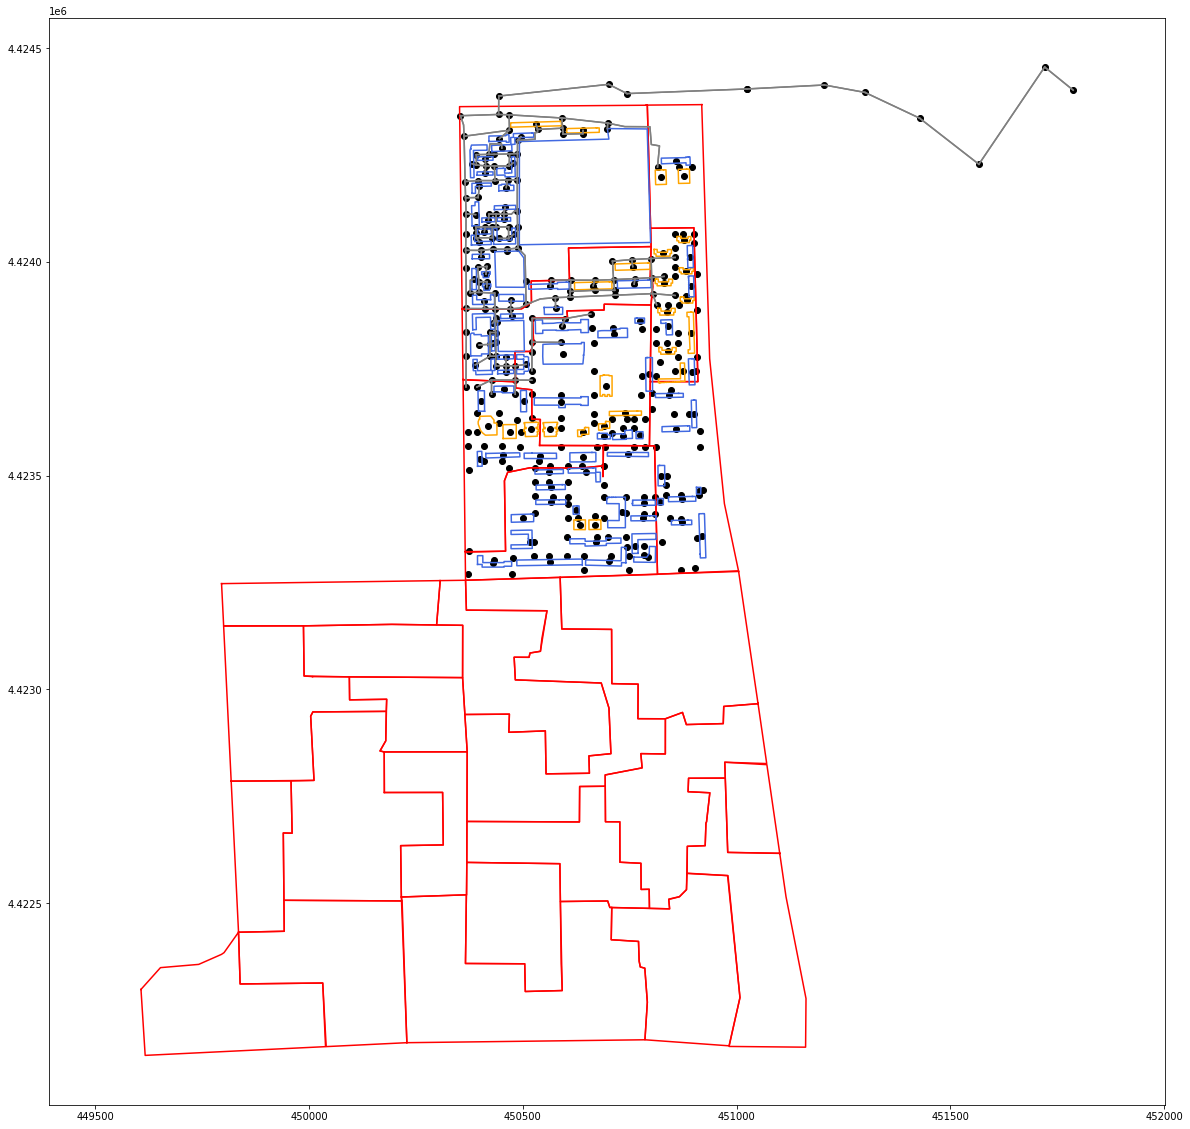

In [42]:
matplot_buildings_nodes_roads(regions, buildings, nodes, roads)

In [6]:
# plot_road_network_satellite(regions, buildings, nodes, roads)

In [35]:
def construct_graph(nodes, roads):
    G_nodes = [
        (nid, { 
            "id": nid,
            "gps": info["point"],
            "xy": projector(*info["point"]),
            "building": info.get("building", None),
            "unit": info.get("unit", None)
        }) for nid, info in nodes.items()
    ]
    for n in G_nodes:
        if n[1]["building"] is None:
            del n[1]["building"]
            del n[1]["unit"]
    G_edges = [
        (
            road["od"][0],
            road["od"][1],
            {
                "od": road["od"],
                "gps": road["points"],
                "xy": [projector(*p) for p in road["points"]],
            }
        ) for road in roads
    ]
    for e in G_edges:
        e[2]["length"] = LineString(e[2]["xy"]).length
    G = DiGraph()
    G.add_nodes_from(G_nodes)
    G.add_edges_from(G_edges)
    return G

G = construct_graph(nodes, roads)

# 检查路网连通性
t = list(nx.connected_components(G.to_undirected()))
assert len(t) == 1


# 检查每个building的gate确实都连到了路网上
nid_set = set(x for x in G.nodes)
for bd in buildings:
    assert bd["gate_id"] in nid_set

print(type(G))
ns = list(G.nodes(data=True))
es = list(G.edges(data=True))
print("nodes:", len(ns))
print("edges:", len(es))
print(ns[0])
print(es[0])

# pickle.dump(G, open("data/G.pkl", "wb"))

<class 'networkx.classes.digraph.DiGraph'>
nodes: 364
edges: 872
(0, {'id': 0, 'gps': (116.41866717844188, 39.96776961721637), 'xy': (450354.13187572977, 4424341.757008429)})
(0, '快递站到路区11', {'od': (0, '快递站到路区11'), 'gps': [(116.41866717844188, 39.96776961721637), (116.41971160506672, 39.96780168233458)], 'xy': [(450354.13187572977, 4424341.757008429), (450443.34968538117, 4424344.735114936)], 'length': 89.26750067835664})


In [36]:
# 合并三个人标的路网
buildings_all = pickle.load(open("data/buildings_new.pkl", "rb"))
nodes_roads_fudan = pickle.load(open("data/nodes_roads_fudan_new.pkl", "rb"))
nodes_roads_jinhui = pickle.load(open("data/nodes_roads_jinhui.pkl", "rb"))
nodes_roads_jinwei = pickle.load(open("data/nodes_roads_jinwei.pkl", "rb"))
nodes_all, roads_all = {}, []
for (nodes, roads), id_offset in zip([nodes_roads_fudan, nodes_roads_jinhui, nodes_roads_jinwei], [0, 10000, 20000]):
    # G = construct_graph(nodes, roads)
    # t = list(nx.connected_components(G.to_undirected()))
    # assert len(t) == 1
    # nids = [nid for nid in nodes.keys() if isinstance(nid, int)]
    # print(min(nids), max(nids))
    for nid, n in nodes.items():
        if isinstance(nid, int):
            nid += id_offset
            n["id"] = nid
        nodes_all[nid] = n
    for r in roads:
        o, d = r["od"]
        if isinstance(o, int):
            o += id_offset
        if isinstance(d, int):
            d += id_offset
        r["od"] = (o, d)
        roads_all.append(r)

# 添加林草局gate_node
for bd in buildings_all:
    if bd["id"] == 233:
        nodes_all[str(bd["id"])] = {
            "id": str(bd["id"]),
            "point": bd["gate_gps"],
            "building": bd["id"],
            "unit": 1,
        }


# 将三块区域进一步连起来
connect_roads = [
    [(191,10007), []],
    [(191,20059), []],
    [(216,20115), []],
    [(213,20095), []],
    [(220,20094), []],
    [(227,20085), []],
    [(10007,20059), []],
    [(10008,20112), []],
    [(10025,20058), []],
    [(10048,20057), []],
    [(10050,20056), []],
    [(10051,20055), []],
    [(10074,20051), []],
    [(10073,20001), []],
    [(10071,20000), []],

    [("233",20121), []],  # 林草局
]

connect_roads = [
    {
        "od": od,
        "points": [nodes_all[od[0]]["point"]] + [gcj2wgs(*p[::-1])[::-1] for p in inter_points] + [nodes_all[od[1]]["point"]]
    } for od, inter_points in connect_roads
]
reverse_connect_roads = [
    {
        "od": (road["od"][1], road["od"][0]),
        "points": road["points"][::-1]
    } for road in connect_roads
]
roads_all += connect_roads
roads_all += reverse_connect_roads

regions = pickle.load(open("data/regions_all.pkl", "rb"))
plot_road_network(regions, buildings_all, nodes_all, roads_all)

In [38]:
G = construct_graph(nodes_all, roads_all)

# 检查路网连通性
t = list(nx.connected_components(G.to_undirected()))
assert len(t) == 1

# 检查每个building的gate确实都连到了路网上
nid_set = set(x for x in G.nodes)
for bd in buildings_all:
    assert bd["gate_id"] in nid_set

print(type(G))
ns = list(G.nodes(data=True))
es = list(G.edges(data=True))
print("nodes:", len(ns))
print("edges:", len(es))
print(ns[0])
print(es[0])

pickle.dump(G, open("data/G_new.pkl", "wb"))

<class 'networkx.classes.digraph.DiGraph'>
nodes: 1024
edges: 2396
(0, {'id': 0, 'gps': (116.41866717844188, 39.96776961721637), 'xy': (450354.13187572977, 4424341.757008429)})
(0, '快递站到路区11', {'od': (0, '快递站到路区11'), 'gps': [(116.41866717844188, 39.96776961721637), (116.41971160506672, 39.96780168233458)], 'xy': [(450354.13187572977, 4424341.757008429), (450443.34968538117, 4424344.735114936)], 'length': 89.26750067835664})
